  

## Research Question 
Can a predictive model be constructed to cross-sell vehicle insurance to current health insurance customers? 
Justification of the Research Question 
The research question was constructed because the insurance company provides health insurance to customers. Stakeholders need to know if current policy holders will be interested in obtaining auto insurance. The company needs to know this so that they can optimize business processes to meet the demand and increase revenue.
##Hypothesis
H0:- A predictive model cannot be constructed on the dataset. 
H1: - A predictive model can be constructed on the dataset. 
The aim is to prove that a logistic regression model can be constructed to predict if customers who have health insurance, will or will not obtain vehicle insurance.

## Context

The contribution of this study to the field of Data Analytics and the MSDA program is to create a predictive model which will aid in the company cross-selling vehicle insurance to current health insurance policyholders. This study will utilize a logistic regression model to predict customers’ response to a cross-selling campaign. The significance of the predictor variables will be analyzed to best predict the probability of cross-selling vehicle insurance to customers. Raja (2022) found that the logistic regression algorithm can be predictive and identify customers with the highest propensity to buy new products and services. Researchers hypothesized that for analyzing binary response variable (i.e. yes or no) with several explanatory variables, a logistic regression model is a useful model for describing their relationships (Astari & Kismiantini, 2019).

## Project Outcomes 
The data analysis project will use logistic regression to create a predictive model. The hypotheses will be tested to see if a predictive model can be constructed on the dataset. Logistic regression suggests predictor variables are significant in the predictions of a target variable using insurance data (Astari & Kismiantini, 2019).

## Data Extraction and Preparation

The environment used to extract and prepare the data is JupyterLab. Python was used for the programming language. The following steps were taken to extract and prepare the data:


In [71]:
#import packages
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

In [72]:
#import test csv and create a dataframe
df_test = pd.read_csv('test.csv',dtype={'locationid':np.int64}) 

In [73]:
#import train csv and create a dataframe
df_train = pd.read_csv('train.csv',dtype={'locationid':np.int64}) 

In [74]:
#check both datasets
df_test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [75]:
df_train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [76]:
#retrieve information of variables
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [77]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127037 entries, 0 to 127036
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    127037 non-null  int64  
 1   Gender                127037 non-null  object 
 2   Age                   127037 non-null  int64  
 3   Driving_License       127037 non-null  int64  
 4   Region_Code           127037 non-null  float64
 5   Previously_Insured    127037 non-null  int64  
 6   Vehicle_Age           127037 non-null  object 
 7   Vehicle_Damage        127037 non-null  object 
 8   Annual_Premium        127037 non-null  float64
 9   Policy_Sales_Channel  127037 non-null  float64
 10  Vintage               127037 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 10.7+ MB


In [78]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127037 entries, 0 to 127036
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    127037 non-null  int64  
 1   Gender                127037 non-null  object 
 2   Age                   127037 non-null  int64  
 3   Driving_License       127037 non-null  int64  
 4   Region_Code           127037 non-null  float64
 5   Previously_Insured    127037 non-null  int64  
 6   Vehicle_Age           127037 non-null  object 
 7   Vehicle_Damage        127037 non-null  object 
 8   Annual_Premium        127037 non-null  float64
 9   Policy_Sales_Channel  127037 non-null  float64
 10  Vintage               127037 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 10.7+ MB


In [79]:
#check for missing values
df_train.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [80]:
df_test.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
dtype: int64

In [81]:
duplicates_train = df_train.duplicated()
print(duplicates_train)
df_train[duplicates_train]

0         False
1         False
2         False
3         False
4         False
          ...  
381104    False
381105    False
381106    False
381107    False
381108    False
Length: 381109, dtype: bool


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response


According to the data table, the statistics of only these variables were relevant. Age had a mean of 39 years and standard deviation of 0.046. There was a minimum age of 20 and max of 85. Median showed that 50% above and below 36. There were 25% of customers less than the age of 25, and 75% of customers less than 49 years old.  Annual Premium column showed that there was a mean of 30564 (foreign currency) and standard deviation of 17213. The minimum premium was 2630, and maximum was 54,0165. According to the values of the quartiles, 75% of customers had a premium less than 39,400. There was a median of 31,669 and 25% had a premium less than 24,405. The Vintage variable had records of how many days a customer was with the company. It had a mean of 154.348 days. The standard deviation was 54.205. The minimum day a customer was associated with the company was 10 days. The max was 299 days. There were 25% that were with the company for less than 29 days. The median was 133. Those who were associated with the business less than 152 days made up 75% of customers.

In [82]:
#retrieve statistics of train dataset
df_train.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [83]:
#retrieve statistics of test dataset
df_test.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage
count,127037.000000,127037.000000,127037.000000,127037.000000,127037.000000,127037.000000,127037.000000,127037.000000
mean,444628.000000,38.765903,0.998134,26.459866,0.460039,30524.643576,111.800468,154.318301
std,36672.567411,15.465814,0.043152,13.209916,0.498403,16945.297103,54.371765,83.661588
min,381110.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000
25%,412869.000000,25.000000,1.000000,15.000000,0.000000,24325.000000,26.000000,82.000000
50%,444628.000000,36.000000,1.000000,28.000000,0.000000,31642.000000,135.000000,154.000000
75%,476387.000000,49.000000,1.000000,35.000000,1.000000,39408.000000,152.000000,227.000000
max,508146.000000,85.000000,1.000000,52.000000,1.000000,472042.000000,163.000000,299.000000


In [84]:
#drop id and drivers license from the dataset
df_train=df_train.drop(["id","Driving_License"], axis = 1)
df_train.head()

,Gender,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,41.0,1,< 1 Year,No,27496.0,152.0,39,0


Univariate and Bivariate statistics of the variables predictor and target variables were conducted. After producing a histogram for the target variable, response, an imbalance in the dataset was observed. The number of observations that had no interest in auto insurance greatly outweighed those who said yes. This would lead to the predictive model being skewed and bias would be noticeably on the side of the major class.

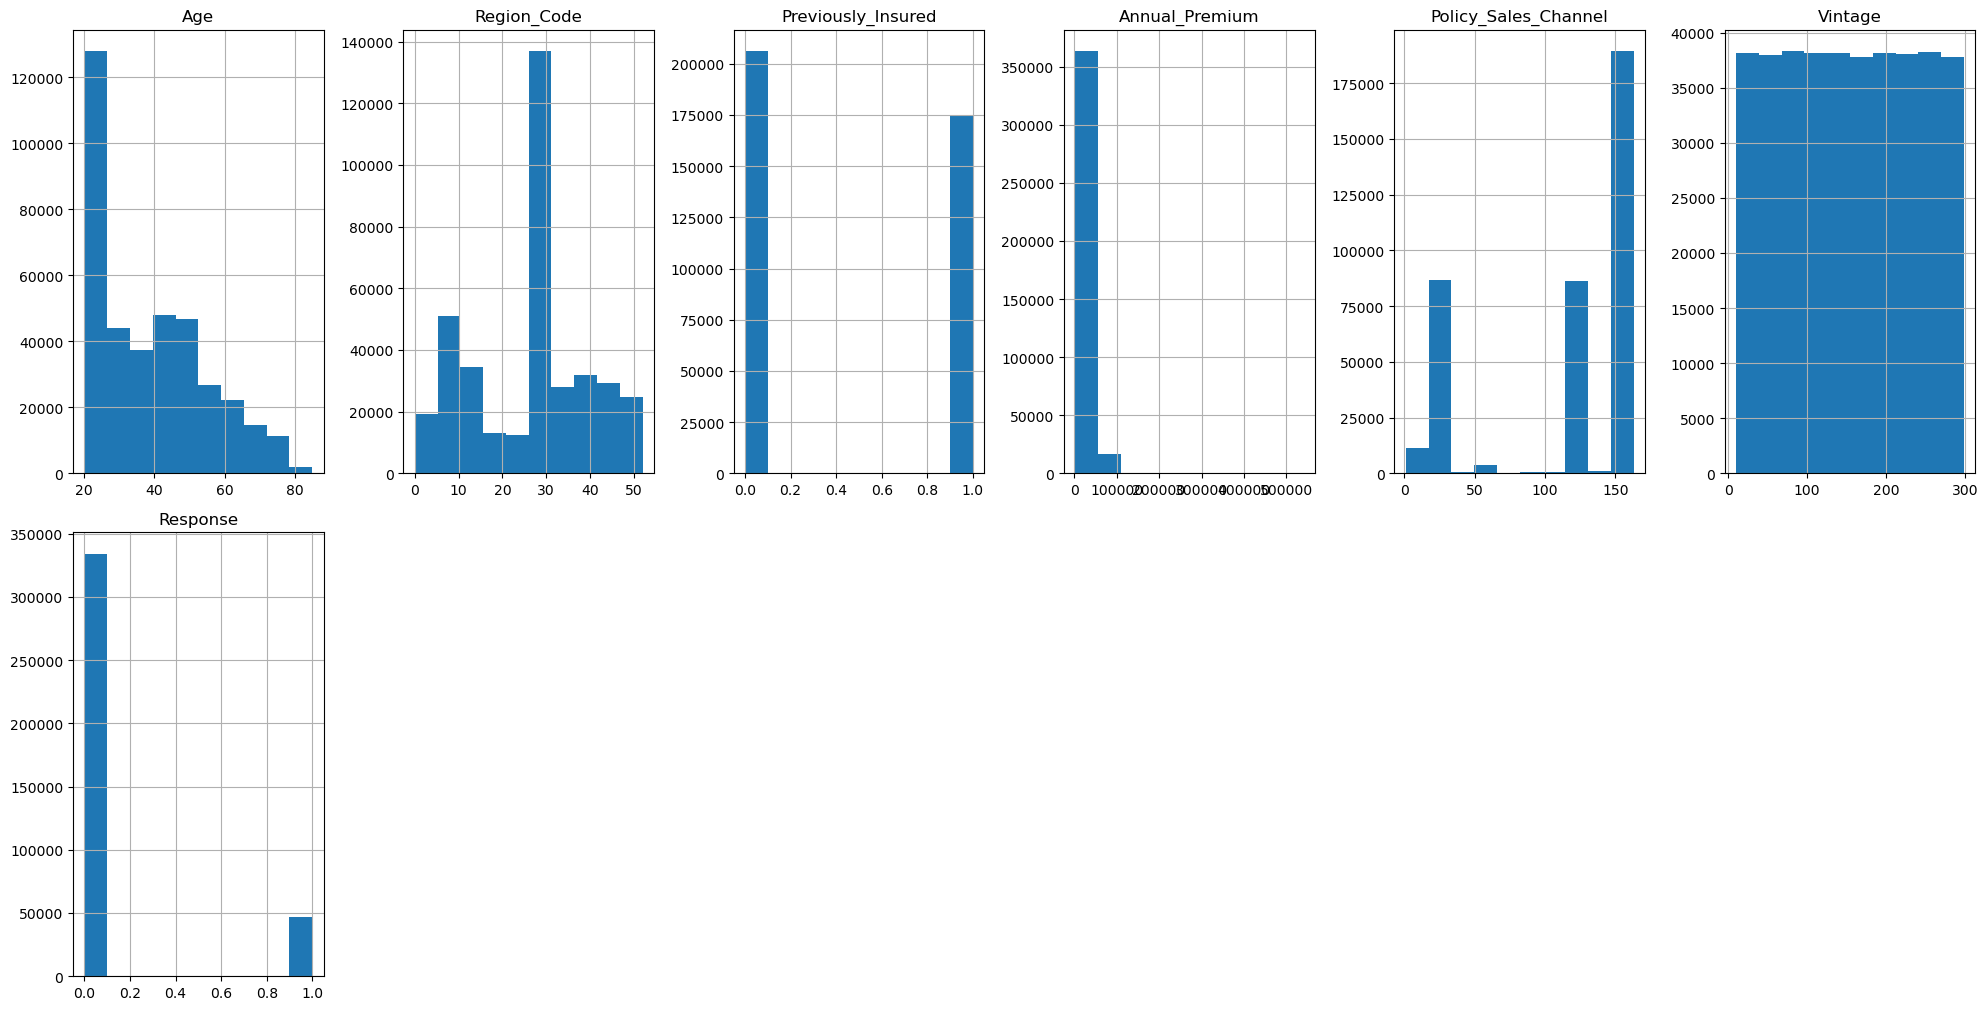

In [85]:
#Univariate Statistics
#plot histograms of variables
df_train.hist(figsize=(20,15), layout=(3,6))
plt.tight_layout()
plt.show()

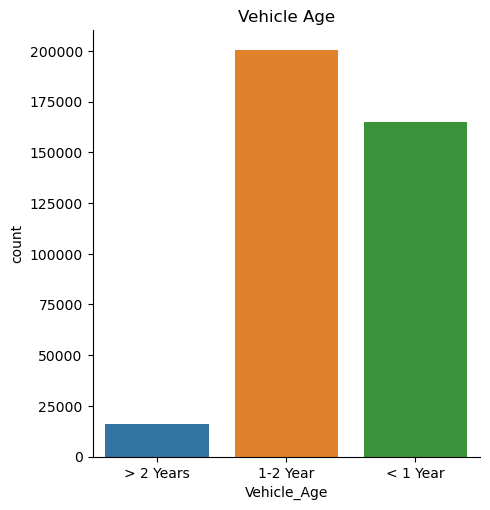

In [86]:
sns.catplot(x='Vehicle_Age', kind='count', data=df_train)
plt.title('Vehicle Age', size=12);

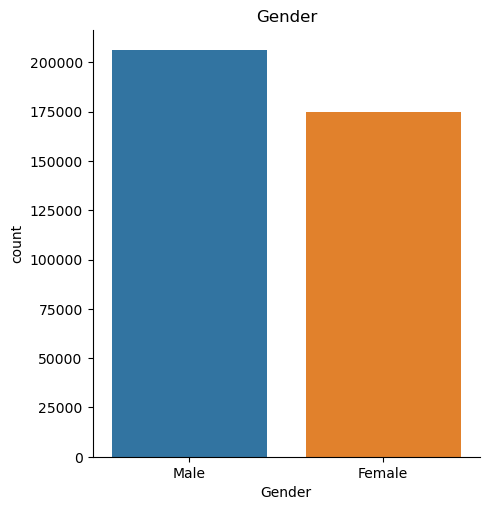

In [87]:
sns.catplot(x='Gender', kind='count', data=df_train)
plt.title('Gender', size=12);

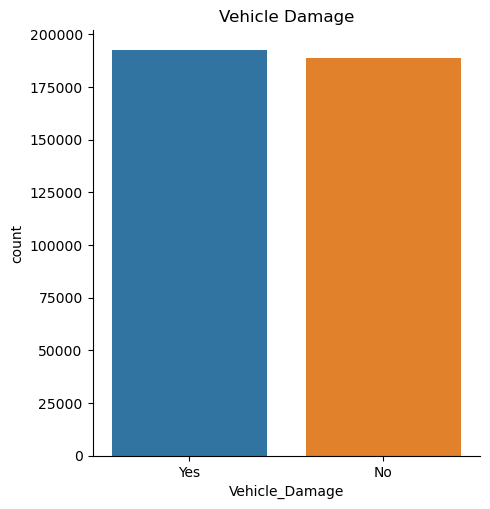

In [88]:
sns.catplot(x='Vehicle_Damage', kind='count', data=df_train)
plt.title('Vehicle Damage', size=12);

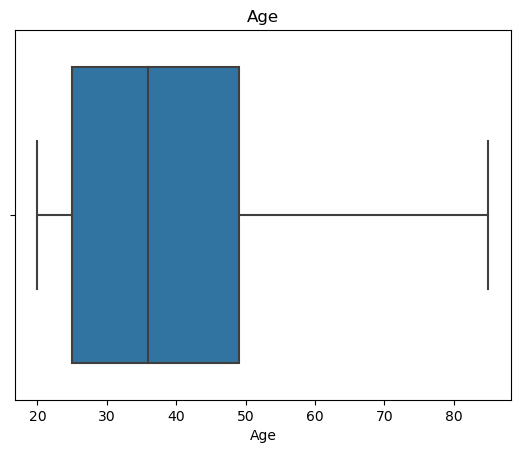

In [89]:
#Find outliers using boxplots for numerical variables
sns.boxplot(x='Age', data=df_train)
plt.title('Age', size=12);

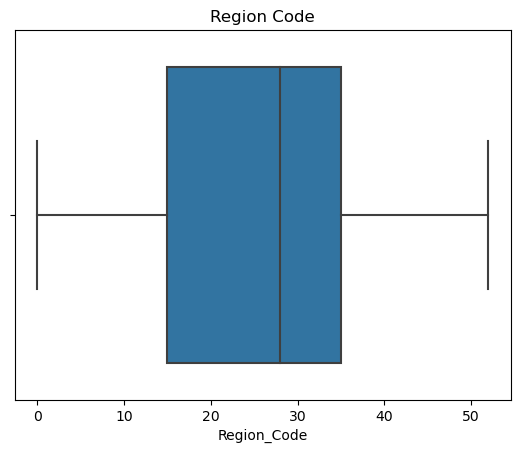

In [90]:
sns.boxplot(x='Region_Code', data=df_train)
plt.title('Region Code', size=12);

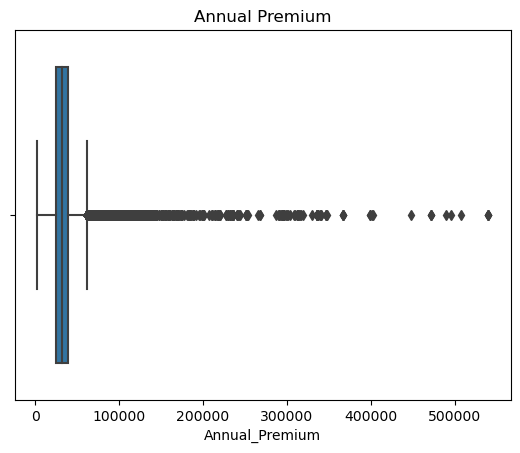

In [91]:
sns.boxplot(x='Annual_Premium', data=df_train)
plt.title('Annual Premium', size=12);

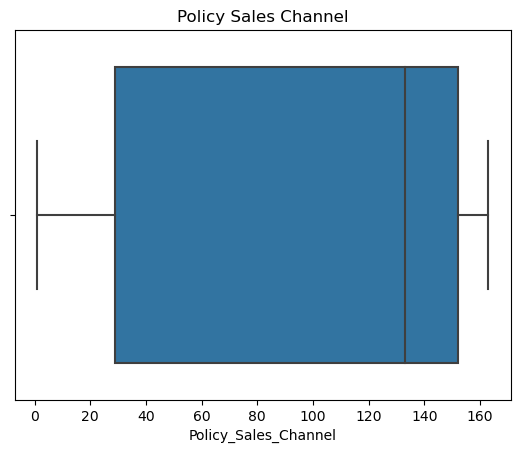

In [92]:
sns.boxplot(x='Policy_Sales_Channel', data=df_train)
plt.title('Policy Sales Channel', size=12);

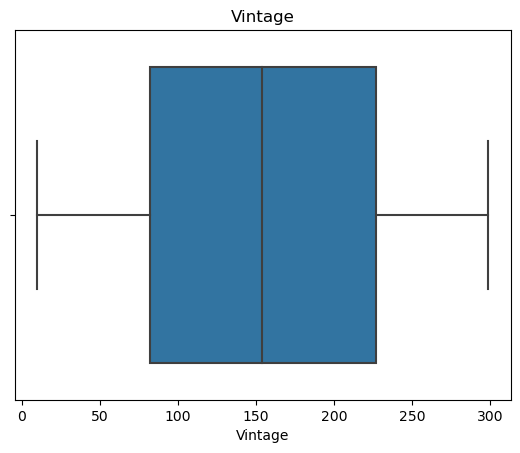

In [93]:
sns.boxplot(x='Vintage', data=df_train)
plt.title('Vintage', size=12);

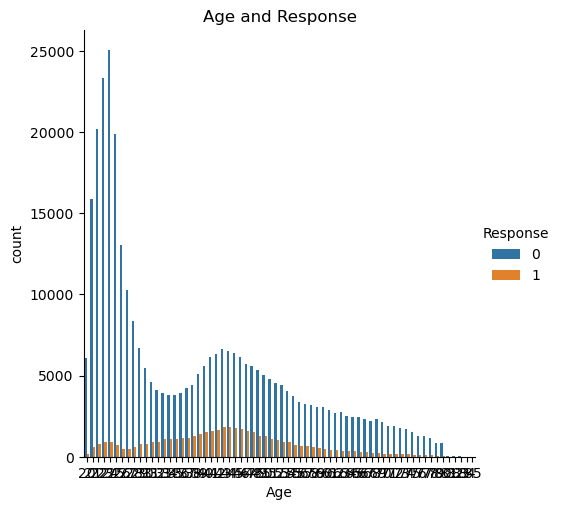

In [94]:
#Bivariate Statistics between the Age and Response variable
sns.catplot(x='Age', hue='Response', kind='count', data=df_train)
plt.title('Age and Response', size=12);

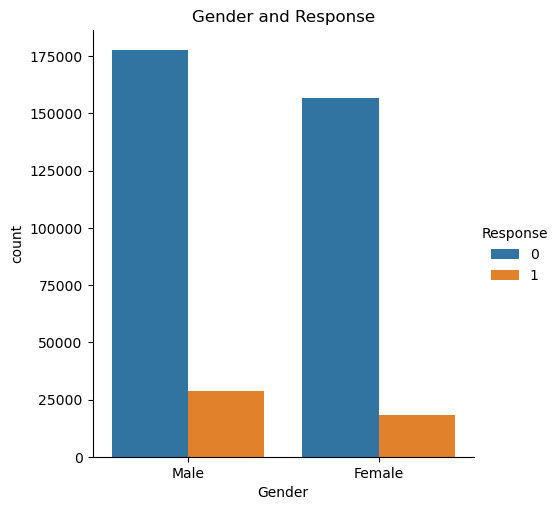

In [95]:
sns.catplot(x='Gender', hue='Response', kind='count', data=df_train)
plt.title('Gender and Response', size=12);

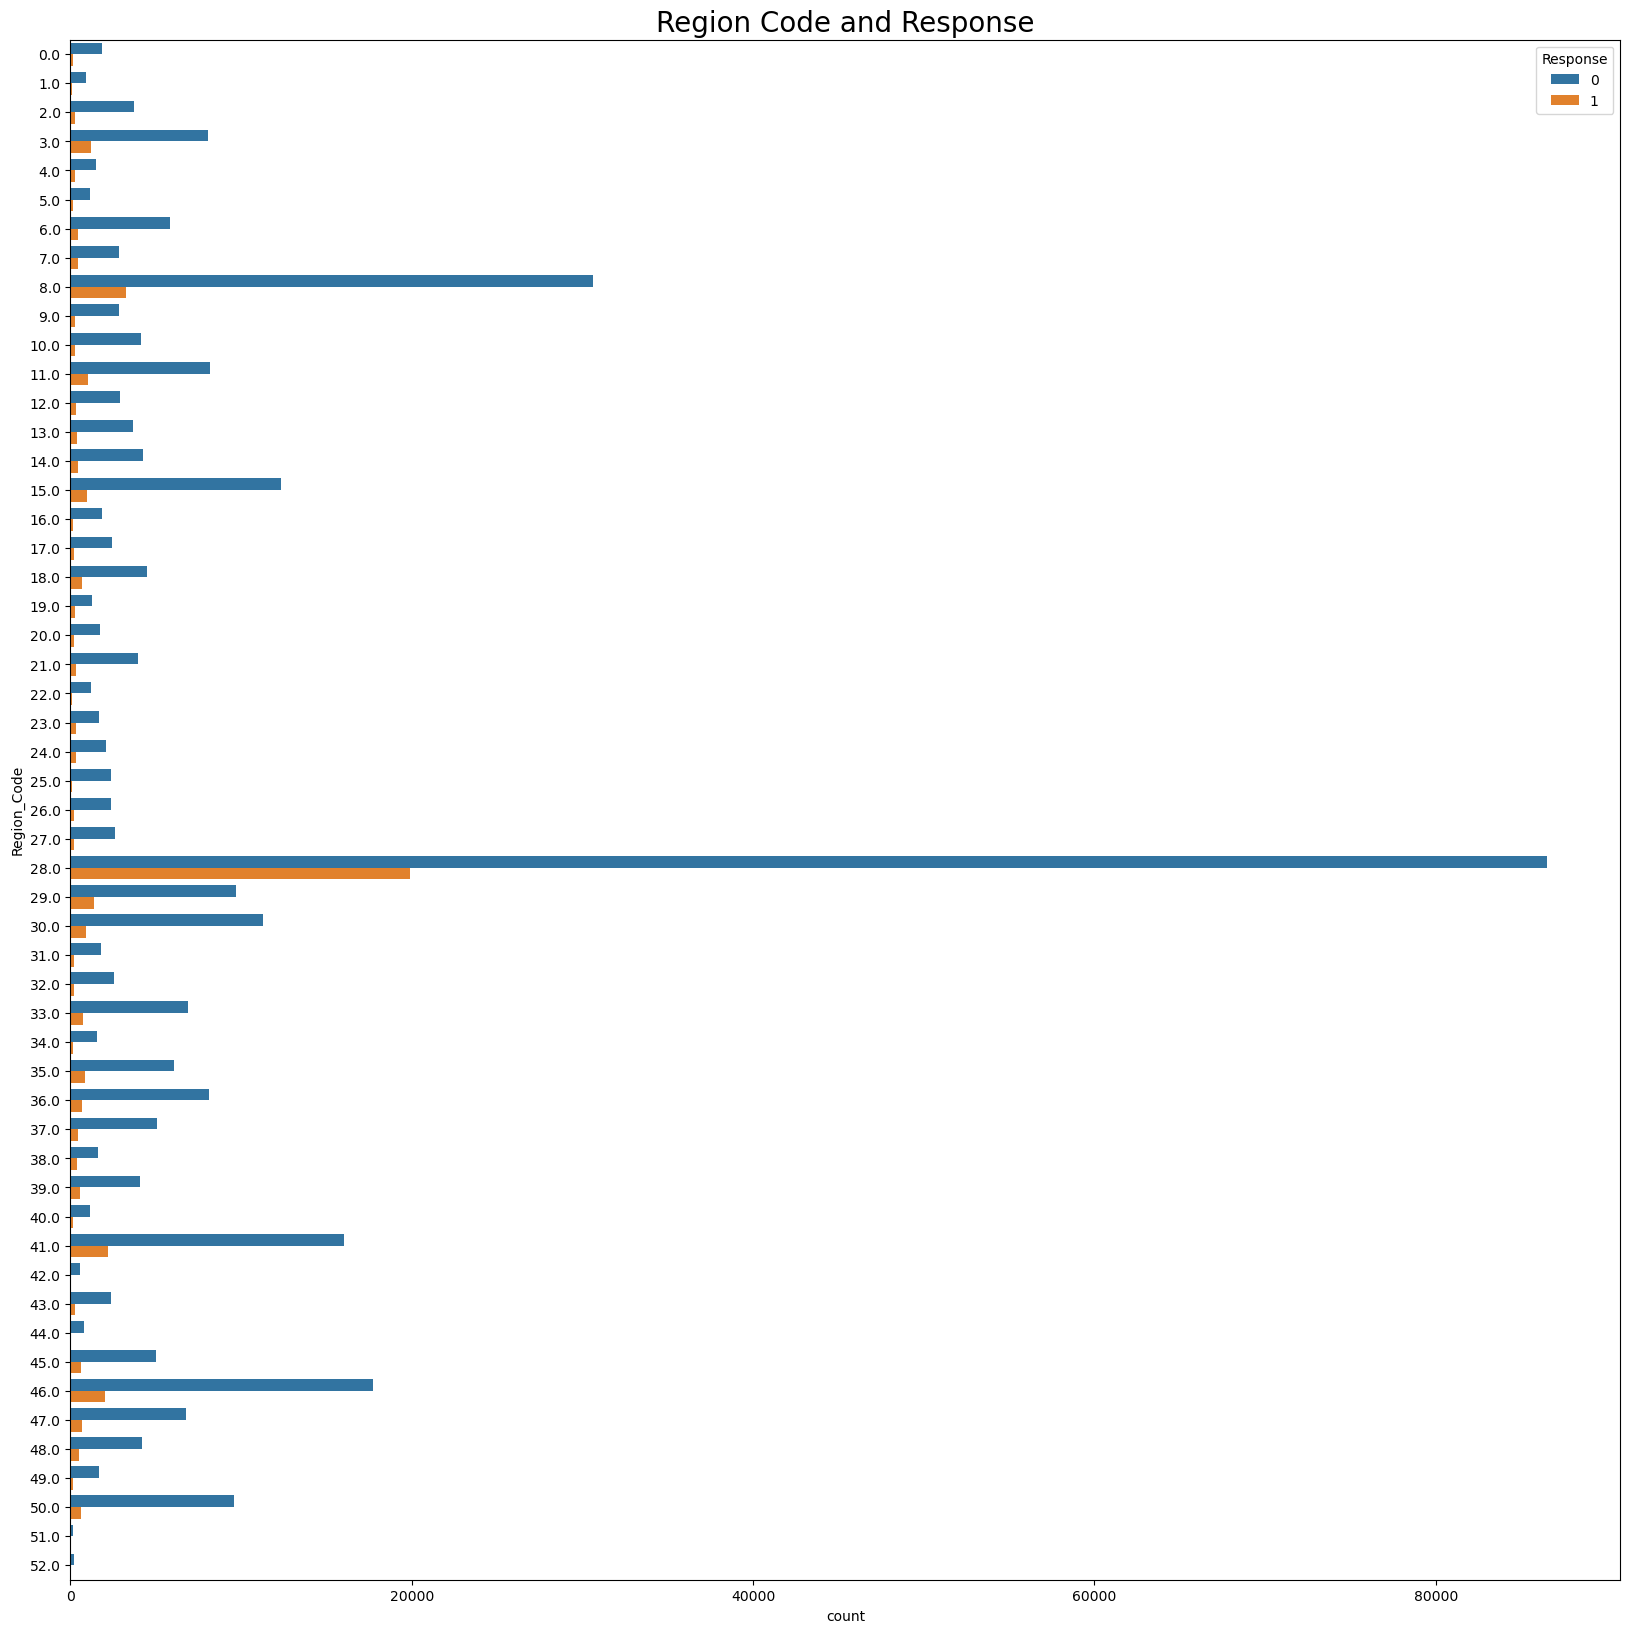

In [96]:
plt.figure(figsize=(20, 20))
sns.countplot(y="Region_Code", hue="Response", data=df_train)
plt.title('Region Code and Response', size=20);
plt.show()

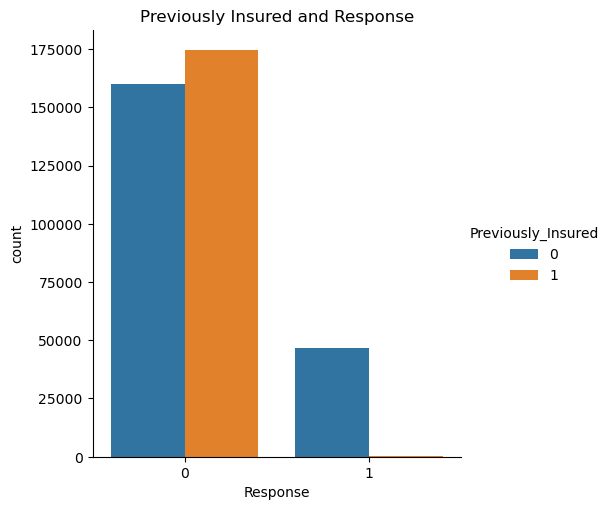

In [97]:
sns.catplot(x='Response',hue='Previously_Insured',data=df_train,kind='count')
plt.title('Previously Insured and Response', size=12);

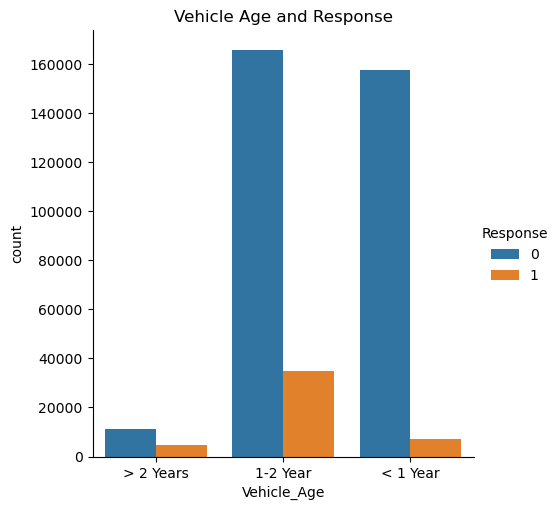

In [98]:
sns.catplot(x='Vehicle_Age', hue='Response', kind='count', data=df_train)
plt.title('Vehicle Age and Response', size=12);

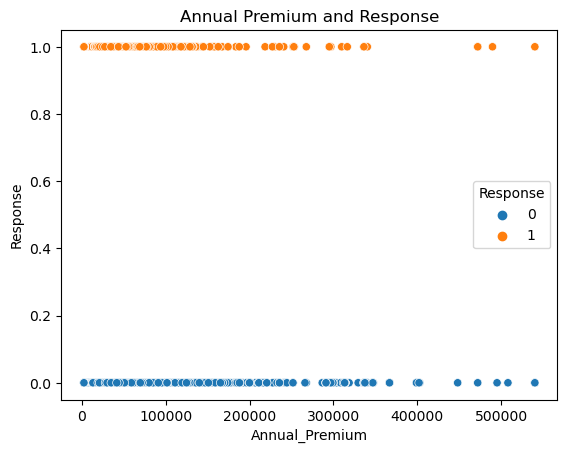

In [99]:
sns.scatterplot(x="Annual_Premium", y="Response",hue="Response", data=df_train)
plt.title('Annual Premium and Response', size=12);

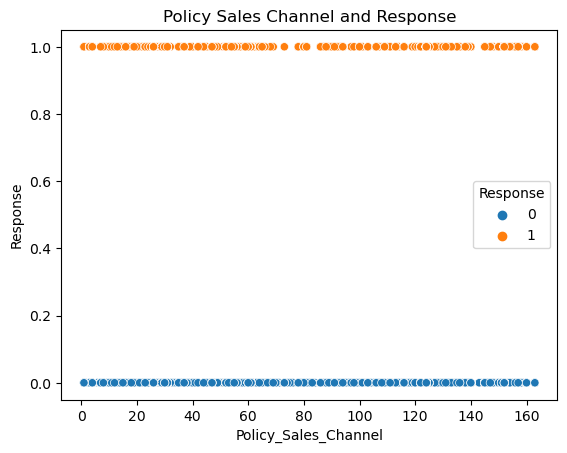

In [100]:
sns.scatterplot(x="Policy_Sales_Channel", y="Response",hue="Response", data=df_train)
plt.title('Policy Sales Channel and Response', size=12);

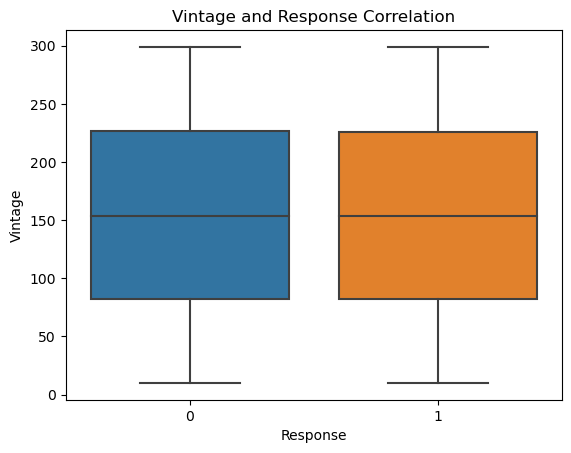

In [101]:
sns.boxplot(x="Response", y="Vintage", data=df_train)
plt.title("Vintage and Response Correlation", size=12);

The categorical variables: gender, vehicle age, and vehicle damage were converted to numerical variables using the map() function. 

In [102]:
#convert categorical variables to numeric using map() function
gender_m={'Male':0,'Female':1}
df_train['Gender']=df_train['Gender'].map(gender_m)
gender_m

{'Male': 0, 'Female': 1}

In [103]:
#convert categorical variables to numeric using map() function
gender_m={'Male':0,'Female':1}
df_test['Gender']=df_test['Gender'].map(gender_m)
gender_m

{'Male': 0, 'Female': 1}

In [104]:
vehicle_age_m={'1-2 Year':0,'< 1 Year':1,'> 2 Years' :2}
df_train['Vehicle_Age']=df_train['Vehicle_Age'].map(vehicle_age_m)
vehicle_age_m

{'1-2 Year': 0, '< 1 Year': 1, '> 2 Years': 2}

In [105]:
vehicle_age_m={'1-2 Year':0,'< 1 Year':1,'> 2 Years' :2}
df_test['Vehicle_Age']=df_test['Vehicle_Age'].map(vehicle_age_m)
vehicle_age_m

{'1-2 Year': 0, '< 1 Year': 1, '> 2 Years': 2}

In [106]:
vehicle_damage_m={'Yes':0,'No':1}
df_train['Vehicle_Damage']=df_train['Vehicle_Damage'].map(vehicle_damage_m)
vehicle_damage_m

{'Yes': 0, 'No': 1}

In [107]:
vehicle_damage_m={'Yes':0,'No':1}
df_test['Vehicle_Damage']=df_test['Vehicle_Damage'].map(vehicle_damage_m)
vehicle_damage_m

{'Yes': 0, 'No': 1}

In [108]:
#check converted variable
df_train['Vehicle_Damage']

0         0
1         1
2         0
3         1
4         1
         ..
381104    1
381105    1
381106    1
381107    0
381108    1
Name: Vehicle_Damage, Length: 381109, dtype: int64

In [109]:
df_test['Vehicle_Damage']

0         1
1         0
2         0
3         0
4         1
         ..
127032    1
127033    0
127034    1
127035    1
127036    1
Name: Vehicle_Damage, Length: 127037, dtype: int64


Although logistic regression does not assume a linear relationship between the dependent and independent variables, we still conducted the normality test.

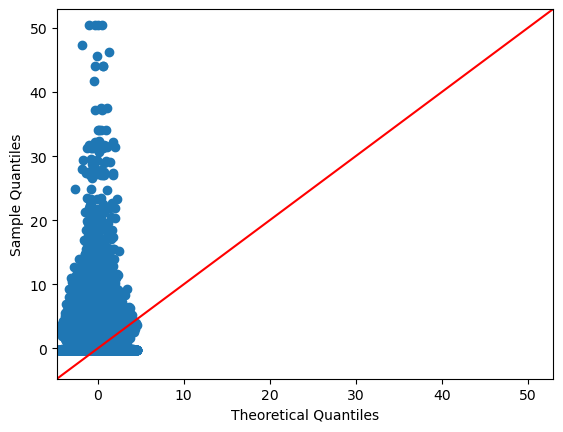

In [110]:
#q-q plot for normality test 
import pylab as py
import scipy.stats as stats

sm.qqplot(df_train, line='45',fit=True,dist=stats.norm)
py.show()

After the preparation of the data, a correlation plot was constructed to show relationships between predictor variables and target variable, Response. The plot showed negative correlation for Previously_Insured | Response and Vehicle_Damage | Response.

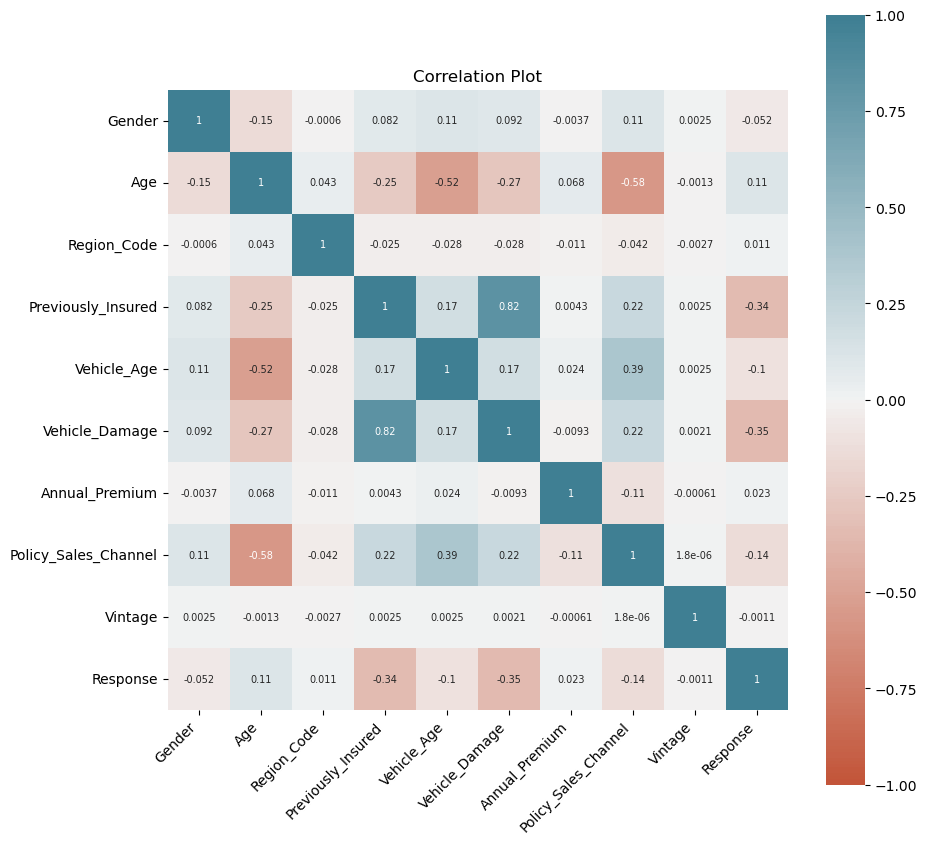

In [111]:
#plot correlation heatmap for predictor and target variables
plt.figure(figsize=(10,10))
plt.title("Correlation Plot")
corr = df_train.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True,
    annot_kws={"size": 7}
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

The predictor variables were assigned to X and the recorded responses were assigned to y. To deal with the imbalance in the dataset and prevent predictive modeling problems, the Synthetic Minority Oversampling Technique (SMOTE) was used. All packages were imported and SMOTE oversampled the minority class in X and y. The data was later split using the 70/30 ratio. Therefore, 70% of the data would be used for the training set and the remaining 30% used for the test set.  These were assigned to X2_train, X2_test, y2_train and y2_test. The shapes were then checked.

In [112]:
#assign variables to x, y and check them
X=df_train.loc[:,'Gender':'Vintage']
X

,Gender,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,0,44,28.0,0,2,0,40454.0,26.0,217
1,0,76,3.0,0,0,1,33536.0,26.0,183
2,0,47,28.0,0,2,0,38294.0,26.0,27
3,0,21,11.0,1,1,1,28619.0,152.0,203
4,1,29,41.0,1,1,1,27496.0,152.0,39
...,...,...,...,...,...,...,...,...,...
381104,0,74,26.0,1,0,1,30170.0,26.0,88
381105,0,30,37.0,1,1,1,40016.0,152.0,131
381106,0,21,30.0,1,1,1,35118.0,160.0,161
381107,1,68,14.0,0,2,0,44617.0,124.0,74


In [113]:
y=df_train['Response']
y

0         1
1         0
2         1
3         0
4         0
         ..
381104    0
381105    0
381106    0
381107    0
381108    0
Name: Response, Length: 381109, dtype: int64

In [114]:
#calculate VIF for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

                feature       VIF
0                Gender  1.857554
1                   Age  5.488101
2           Region_Code  4.517236
3    Previously_Insured  5.788679
4           Vehicle_Age  2.343393
5        Vehicle_Damage  6.198064
6        Annual_Premium  3.906139
7  Policy_Sales_Channel  5.082119
8               Vintage  4.057632


In [115]:
#import packages for logitisc regression
import statsmodels.formula.api as smf
from sklearn import metrics 
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score

In [116]:
#train test split
from sklearn.model_selection import train_test_split

#apply SMOTE algorithm because of imbalance in dataset

from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
smote = SMOTE()
X2, y2 = smote.fit_resample(X,y)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2,test_size=0.3,random_state=5)

In [117]:
X2_train.shape

(468158, 9)

In [118]:
y2_train.shape


(468158,)

In [119]:
y2_test.shape

(200640,)

In [120]:
X2_test.shape


(200640, 9)

In [121]:
#save new csv files
pd.DataFrame(X2_train).to_csv('X2_train.csv')
pd.DataFrame(X2_test).to_csv('X2_test.csv')
pd.DataFrame(y2_train).to_csv('y2_train.csv')
pd.DataFrame(y2_test).to_csv('y2_test.csv')


## Analysis

A logistic regression model was constructed and fitted to the training data. The test data was used for prediction outcomes. The classification report was constructed to measure the quality of predictions using accuracy, precision, f1 score and recall. The accuracy and f1 score were also calculated and displayed separately.

In [122]:
#Train the new Logistic Model
model = LogisticRegression(solver='liblinear')
model.fit(X2_train,y2_train)

LogisticRegression(solver='liblinear')

In [123]:
#prediction with test set
y2_pred = model.predict(X2_test)

#accuracy score
accuracy = accuracy_score(y2_test, y2_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8122109250398724


In [124]:
#print classification report
print(classification_report(y2_test,y2_pred))

              precision    recall  f1-score   support

           0       0.91      0.69      0.79    100208
           1       0.75      0.94      0.83    100432

    accuracy                           0.81    200640
   macro avg       0.83      0.81      0.81    200640
weighted avg       0.83      0.81      0.81    200640



In [125]:
#f1 score of the model
f1 = f1_score(y2_test, y2_pred,average='weighted')
print('F1 Score:',f1)

F1 Score: 0.8092572493980696


In [126]:
#calculate log loss
from sklearn.metrics import log_loss
logloss = log_loss(y2_test, model.predict_proba(X2_test))
logloss

0.40313879817097337

The Receiver Operating Characteristic (ROC) Curve was also used as an evaluation metric. It is a plot test for sensitivity(true positive rate) and specificity(false positive rate)s.  The code and output for the ROC curve:

In [127]:
roc_auc2=roc_auc_score(y2_test,model.predict_proba(X2_test)[:, 1])
print("ROC AUC Score:",roc_auc2)

ROC AUC Score: 0.8657136485924475


In [128]:
#The ROC curve calculated for false positive and true positive rate
fpr, tpr, _ = roc_curve(y2_test, model.predict_proba(X2_test)[:, 1])

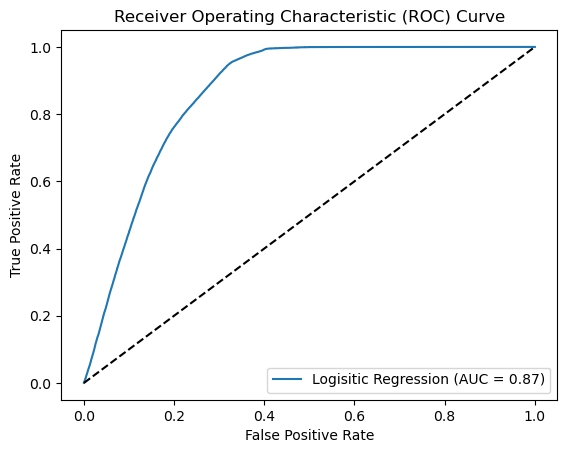

In [129]:
#plot the ROC Curve
plt.plot(fpr, tpr, label='Logisitic Regression (AUC = %0.2f)' % roc_auc2)
plt.plot([0,1],[0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

A confusion matrix was plotted. It summarized and visualized the algorithm’s correct and incorrect predictions.  The output after running the code was:

In [130]:
#create confusion matrix
cm2 = (confusion_matrix(y2_test, y2_pred))
print(cm2)

[[68942 31266]
 [ 6412 94020]]


Text(0.5, 23.52222222222222, 'Predicted Label')

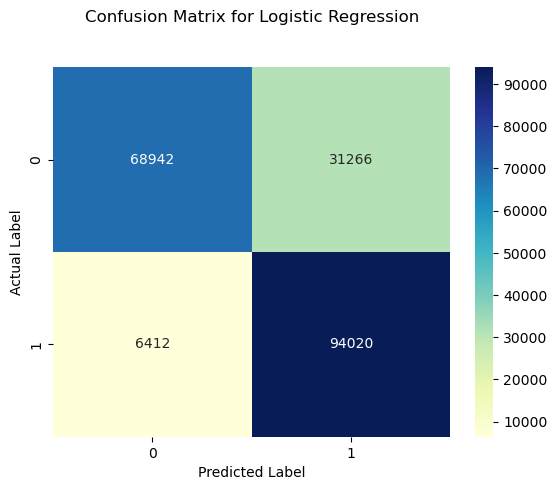

In [131]:
#plot confusion matrix
sns.heatmap(pd.DataFrame(cm2), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion Matrix for Logistic Regression', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

An Extreme Gradient Boosting algorithm (XGBoost) was later run to compare performance and accuracy of that model versus a logistic regression model. After the library was imported, the gradient boosted decision tree algorithm was implemented. Boosting corrected the errors made by existing models by adding new models sequentially. This was done until it could no longer be improved. 

In [132]:
#import XGBoost packages
from xgboost import XGBClassifier

#fit model to data
xgb = XGBClassifier()
xgb.fit(X2_train,y2_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [133]:
#xgboost classification report

xgb_pred = xgb.predict(X2_test)
xgb_classrep = pd.DataFrame(metrics.classification_report(y2_test, xgb_pred, output_dict=True)).transpose()
print(xgb_classrep)

              precision    recall  f1-score        support
0              0.894203  0.894479  0.894341  100208.000000
1              0.894682  0.894406  0.894544  100432.000000
accuracy       0.894443  0.894443  0.894443       0.894443
macro avg      0.894443  0.894443  0.894443  200640.000000
weighted avg   0.894443  0.894443  0.894443  200640.000000


In [134]:
roc_auc_xgb=roc_auc_score(y2_test,xgb.predict_proba(X2_test)[:, 1])
print("ROC AUC Score:",roc_auc_xgb)

ROC AUC Score: 0.9705216981619922


In [135]:
#The ROC curve calculated for false positive and true positive rate
fpr, tpr, _ = roc_curve(y2_test, xgb.predict_proba(X2_test)[:, 1])

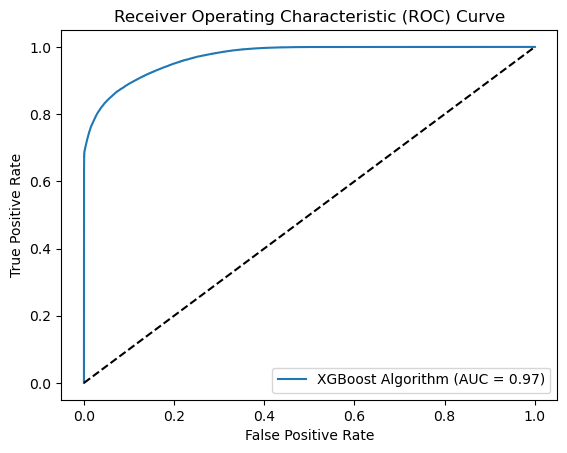

In [136]:
#plot the ROC Curve for XGB
plt.plot(fpr, tpr, label='XGBoost Algorithm (AUC = %0.2f)' % roc_auc_xgb)
plt.plot([0,1],[0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [137]:
#create confusion matrix
cm_xgb = (confusion_matrix(y2_test, xgb_pred))
print(cm_xgb)

[[89634 10574]
 [10605 89827]]


Text(0.5, 23.52222222222222, 'Predicted Label')

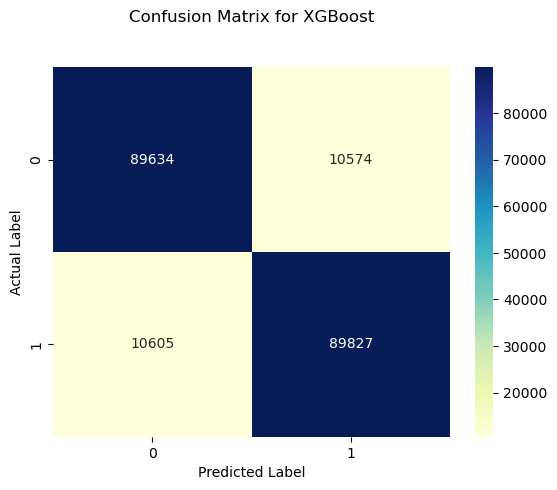

In [138]:
#plot confusion matrix
sns.heatmap(pd.DataFrame(cm_xgb), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion Matrix for XGBoost', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

In [139]:
#save the xgboost model
xgbfile = "xgb_model.pkl"
joblib.dump(xgb, xgbfile)

['xgb_model.pkl']

In [140]:
#save the logistic regression model
lrfile = "lr_model.pkl"
joblib.dump(model, lrfile)

['lr_model.pkl']

## Justification of Analysis Techniques
Logistic regression model was created to describe the impact of multiple predictor variables on a single response variable. An advantage of using this technique is that it is easy to implement, interpret and train the data. The binary logistic regression can extend to multinomial regression or multiple classes easily. A disadvantage is that it can be difficult to obtain complex relationships versus a neural network algorithm. Therefore, accuracy in prediction can be affected. The XGBoost algorithm was later used for the analysis because it works well at classification or regression on this large tabular/structured dataset. An advantage of using XGBoost is that it uses the power of parallel processing, therefore multiple CPU cores are used to execute the model. It is much faster than just gradient boosting machine (GBM). The disadvantage is that overfitting can sometime occur if the parameters are not tuned properly. 

   

## Results of Analysis and Implications

The results proved that a predictive model could be constructed on the dataset. Therefore, the null hypothesis was rejected. A logistic regression model was first constructed and fitted to the training data. The test data was used for prediction outcomes and had an accuracy of 0.82. The prediction of a binary outcome was correctly done to 82% of the samples. The aim was to be closer to 1. The classification report also showed the precision, f1 score and recall. The focus was on the f1 score as it is the harmonic mean or balanced measure of precision and recall. This was 0.81. After plotting the ROC Curve, it appeared to be further from the diagonal line. This meant that it was better at distinguishing positives and negatives. The Area Under the Curve (AUC) was 0.87. There was high probability of high true positive rates (TPR) and low false positive rates (FPR). Confusion matrix displayed 69630 true positive predictions, 94167 true negative predictions, 30578 false positive predictions and 6265 false negative predictions.
The next model created and fitted was XGBoost classifier.  The model accurately classified positive and negative responses on 89%. of the samples. The ROC AUC score was 0.97. This was almost perfect. The XGBoost’s confusion matrix plotted had 89491 true positive predictions and 89948 true negative predictions. There were also 10717 false positive predictions and 10484 false negative predictions. XGBoost model had a better performance compared to the logistic regression model. According to the first model, more customers would not be interested in obtaining vehicle insurance. XGBoost model suggested that predictions of customers interested and not interested, were almost even. The model proved that it could accurately identify current policyholders that would respond (yes/no) to an auto insurance campaign.

## Limitation

The age of the data was not specified. There was no indication if the dataset was updated recently.


## Course of Action

The analysis provided two models that had high accuracy in predicting the response of current health insurance customers, as it regards cross-selling vehicle insurance. The insurance company can create auto insurance campaigns for current health insurance policy holders based on these models. These models, with high accuracy of predictions, allow the business to optimize processes so that they can support customers and generate revenue.   

## Proposal

For further studies, it would be suggested that:
* Feature engineering/scaling be performed. This would aid in better analysis.
* Implement more models such as Random Forest, CatBoost and Decision Tree with hyperparameter tuning to get better results.